In [7]:
#Part 1.1

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('EuCitiesTemperatures.csv')
avgLatitude = df.groupby('country')['latitude'].mean().round(2)
avgLongitude = df.groupby('country')['longitude'].mean().round(2)
avgLatitude.round(2)
avgLongitude.round(2)

countryLatList = avgLatitude.index.tolist()
countryLongList = avgLongitude.index.tolist()

for ind in df.index:
    if np.isnan(df['latitude'][ind]):
        df.at[ind, 'latitude'] = avgLatitude[df['country'][ind]]
    if np.isnan(df['longitude'][ind]):
        df.at[ind, 'longitude'] = avgLongitude[df['country'][ind]]


print(df[['latitude', 'longitude']])



     latitude  longitude
0       41.12      20.08
1       42.50       1.52
2       47.85      11.41
3       47.08      14.02
4       48.32      14.29
..        ...        ...
208     55.95      -2.94
209     50.70      -3.53
210     53.55      -4.23
211     55.87      -4.25
212     51.63      -3.95

[213 rows x 2 columns]


In [8]:
#Part 1.2
modified_df = df[(df['latitude'].between(40,60)) & (df['longitude'].between(15,30))]
countries = modified_df.groupby('country').count()
maxCount = 0

for ind in countries.index:
    if countries['city'][ind] > maxCount:
        maxCount = countries['city'][ind]

print(maxCount)

countryList = []
for ind in countries.index:
    if countries['city'][ind] == maxCount:
        countryList.append(ind)

print(countryList)




9
['Poland', 'Romania']


In [9]:
#Part 1.3

noCoastline = df[(df['coastline'] == 'no') & (df['EU'] == 'yes') ]
noEU = df[(df['coastline'] == 'yes') & (df['EU'] == 'no')]
CoastlineAndEu = df[(df['coastline'] == 'yes') & (df['EU'] == 'yes')]
noCoastlineAndEu =  df[(df['coastline'] == 'no') & (df['EU'] == 'no')]

noCoastlineAvgTemp = noCoastline['temperature'].mean().round(2)
noEUAvgTemp = noEU['temperature'].mean().round(2)
CoastlineAndEuAvgTemp = CoastlineAndEu['temperature'].mean().round(2)
noCoastlineAndEuAvgTemp = noCoastlineAndEu['temperature'].mean().round(2)

for ind in df.index:
    if np.isnan(df['temperature'][ind]):
        if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
            df.at[ind, 'temperature'] = CoastlineAndEuAvgTemp
        elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
             df.at[ind, 'temperature'] = noCoastlineAndEuAvgTemp
        elif df['coastline'][ind] == 'yes':
             df.at[ind, 'temperature'] = noEUAvgTemp
        else:
             df.at[ind, 'temperature'] = noCoastlineAvgTemp

print(df['temperature'])





0      15.18
1       7.48
2       4.54
3       6.91
4       6.79
       ...  
208    10.31
209    10.14
210     8.00
211     8.60
212     9.73
Name: temperature, Length: 213, dtype: float64


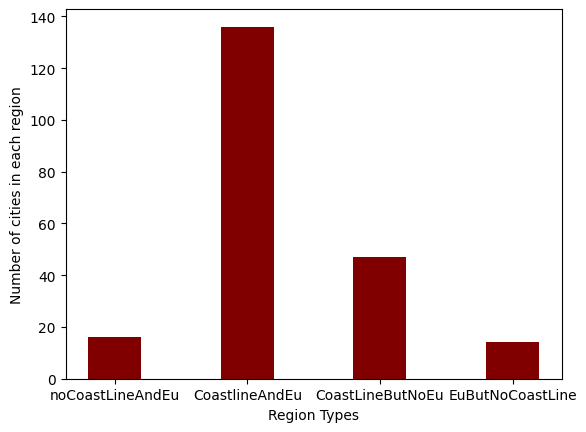

In [10]:
#Visualization
#Part 1.4

regionFrequency = {
    'noCoastLineAndEu' : 0,
    'CoastlineAndEu': 0,
    'CoastLineButNoEu': 0,
    'EuButNoCoastLine' : 0
}


for ind in df.index:
    if df['coastline'][ind] == 'yes' and df['EU'][ind] == 'yes':
        regionFrequency['CoastlineAndEu'] += 1
    elif df['coastline'][ind] == 'no' and df['EU'][ind] == 'no':
        regionFrequency['noCoastLineAndEu'] += 1
    elif df['coastline'][ind] == 'yes':
        regionFrequency['CoastLineButNoEu'] += 1
    else:
        regionFrequency['EuButNoCoastLine'] += 1


regionTypes = list(regionFrequency.keys())
frequencies = list(regionFrequency.values())
plt.bar(regionTypes, frequencies, color = 'maroon', width = 0.4)
plt.xlabel('Region Types')
plt.ylabel('Number of cities in each region')

plt.show()


<AxesSubplot: xlabel='longitude', ylabel='latitude'>

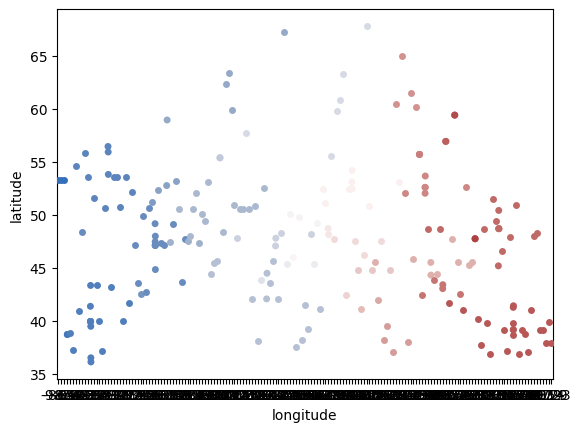

In [13]:
#Visualization
#Part 1.2

sns.stripplot(
    data = df,
    x = "longitude",
    y = "latitude",
    hue = "country",
    palette = 'vlag',
    legend = False,
    native_scale=False
)

